In [8]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [9]:
# Manipulation with dates
from datetime import date
from dateutil.relativedelta import relativedelta

In [10]:
# Machine learning
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [11]:
incidents = pd.read_excel('incidents_porto.xlsx')
incidents.head()

,iconCategory,magnitudeOfDelay,startTime,endTime,length,delay,roadNumbers,events,coordinates,date,time,site,day
0,6,3,2021-05-07T05:44:30Z,2021-05-07T19:30:30Z,10522.828,1926,"['E01', 'IC23', 'IP1', 'A20']",Stationary traffic,"[[-8.5757773064, 41.0876803666], [-8.575762554...",2021-05-07,18:45:14,Porto,Friday
1,8,4,2021-02-11T15:01:00Z,None,99.663,0,[],Closed,"[[-8.5836804352, 41.1503970686], [-8.583941950...",2021-05-07,20:25:26,Porto,Friday
2,6,3,2021-05-08T12:29:30Z,2021-05-08T12:52:30Z,134.971,171,[],Stationary traffic,"[[-8.580417528, 41.1141778609], [-8.5805623672...",2021-05-08,13:33:02,Porto,Saturday
3,6,3,2021-05-08T12:29:30Z,2021-05-08T12:57:30Z,134.971,171,[],Stationary traffic,"[[-8.580417528, 41.1141778609], [-8.5805623672...",2021-05-08,13:38:03,Porto,Saturday
4,6,3,2021-05-08T15:49:00Z,2021-05-08T16:13:00Z,251.594,207,[],Stationary traffic,"[[-8.5824157737, 41.1637759694], [-8.582543178...",2021-05-08,16:53:34,Porto,Saturday


In [12]:
incidents = incidents.drop(columns=['startTime', 'endTime', 'coordinates'])
incidents.head()

,iconCategory,magnitudeOfDelay,length,delay,roadNumbers,events,date,time,site,day
0,6,3,10522.828,1926,"['E01', 'IC23', 'IP1', 'A20']",Stationary traffic,2021-05-07,18:45:14,Porto,Friday
1,8,4,99.663,0,[],Closed,2021-05-07,20:25:26,Porto,Friday
2,6,3,134.971,171,[],Stationary traffic,2021-05-08,13:33:02,Porto,Saturday
3,6,3,134.971,171,[],Stationary traffic,2021-05-08,13:38:03,Porto,Saturday
4,6,3,251.594,207,[],Stationary traffic,2021-05-08,16:53:34,Porto,Saturday


In [13]:
ord_enc = OrdinalEncoder()
incidents["events_code"] = ord_enc.fit_transform(incidents[["events"]]).astype(int)
incidents["road_code"] = ord_enc.fit_transform(incidents[["roadNumbers"]]).astype(int)
incidents.head()

,iconCategory,magnitudeOfDelay,length,delay,roadNumbers,events,date,time,site,day,events_code,road_code
0,6,3,10522.828,1926,"['E01', 'IC23', 'IP1', 'A20']",Stationary traffic,2021-05-07,18:45:14,Porto,Friday,3,3
1,8,4,99.663,0,[],Closed,2021-05-07,20:25:26,Porto,Friday,0,7
2,6,3,134.971,171,[],Stationary traffic,2021-05-08,13:33:02,Porto,Saturday,3,7
3,6,3,134.971,171,[],Stationary traffic,2021-05-08,13:38:03,Porto,Saturday,3,7
4,6,3,251.594,207,[],Stationary traffic,2021-05-08,16:53:34,Porto,Saturday,3,7


In [14]:
# Transformar variaveis em tipo categorico
lista = ['roadNumbers','events','site', 'day']
for i in lista:
    incidents[i] = pd.Categorical(incidents[i])

In [15]:
# Transformar varivaveis em tipo numerico
incidents['length'] = incidents['length'].astype(np.int64)

In [16]:
#Combinar date e time em uma única variável chamada "period", tranformar para o formato datetime.
incidents['period'] = incidents['date'].astype(str) + ' ' + incidents['time'].astype(str)
incidents = incidents.drop(columns=['date', 'time']) 
print(incidents['period'])

0      2021-05-07 18:45:14
1      2021-05-07 20:25:26
2      2021-05-08 13:33:02
3      2021-05-08 13:38:03
4      2021-05-08 16:53:34
              ...         
204    2021-05-14 11:44:59
205    2021-05-14 11:50:00
206    2021-05-14 11:55:01
207    2021-05-14 12:00:02
208    2021-05-14 12:05:02
Name: period, Length: 209, dtype: object


In [17]:
incidents['period'] = pd.to_datetime(incidents['period'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

In [18]:
incidents['day_code'] = incidents['period'].dt.dayofweek
incidents['Hour'] = incidents['period'].dt.hour
incidents['Minute'] = incidents['period'].dt.minute

In [19]:
incidents.head()

,iconCategory,magnitudeOfDelay,length,delay,roadNumbers,events,site,day,events_code,road_code,period,day_code,Hour,Minute
0,6,3,10522,1926,"['E01', 'IC23', 'IP1', 'A20']",Stationary traffic,Porto,Friday,3,3,2021-05-07 18:45:14,4,18,45
1,8,4,99,0,[],Closed,Porto,Friday,0,7,2021-05-07 20:25:26,4,20,25
2,6,3,134,171,[],Stationary traffic,Porto,Saturday,3,7,2021-05-08 13:33:02,5,13,33
3,6,3,134,171,[],Stationary traffic,Porto,Saturday,3,7,2021-05-08 13:38:03,5,13,38
4,6,3,251,207,[],Stationary traffic,Porto,Saturday,3,7,2021-05-08 16:53:34,5,16,53


In [20]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   iconCategory      209 non-null    int64         
 1   magnitudeOfDelay  209 non-null    int64         
 2   length            209 non-null    int64         
 3   delay             209 non-null    int64         
 4   roadNumbers       209 non-null    category      
 5   events            209 non-null    category      
 6   site              209 non-null    category      
 7   day               209 non-null    category      
 8   events_code       209 non-null    int32         
 9   road_code         209 non-null    int32         
 10  period            209 non-null    datetime64[ns]
 11  day_code          209 non-null    int64         
 12  Hour              209 non-null    int64         
 13  Minute            209 non-null    int64         
dtypes: category(4), datetime64

In [21]:
incidents.describe()

,iconCategory,magnitudeOfDelay,length,delay,events_code,road_code,day_code,Hour,Minute
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,6.028708,2.244019,2168.363636,298.856459,1.990431,4.306220,1.765550,12.411483,31.354067
std,0.238462,0.773836,2211.461393,259.294361,0.925028,1.901925,1.607542,4.783089,16.977332
min,6.000000,1.000000,99.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,6.000000,2.000000,688.000000,144.000000,1.000000,3.000000,0.000000,8.000000,18.000000
50%,6.000000,2.000000,1395.000000,234.000000,2.000000,3.000000,1.000000,10.000000,33.000000
75%,6.000000,3.000000,2931.000000,388.000000,3.000000,7.000000,3.000000,18.000000,45.000000
max,8.000000,4.000000,12151.000000,1926.000000,3.000000,7.000000,5.000000,22.000000,59.000000


In [22]:
# Resumo da distribuição de classe 
from collections import Counter
classes = incidents.values[:,1]
counter = Counter(classes)
for k,v in counter.items():
	per = v / len(classes) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=3, Count=85, Percentage=40.670%
Class=4, Count=3, Percentage=1.435%
Class=1, Count=40, Percentage=19.139%
Class=2, Count=81, Percentage=38.756%


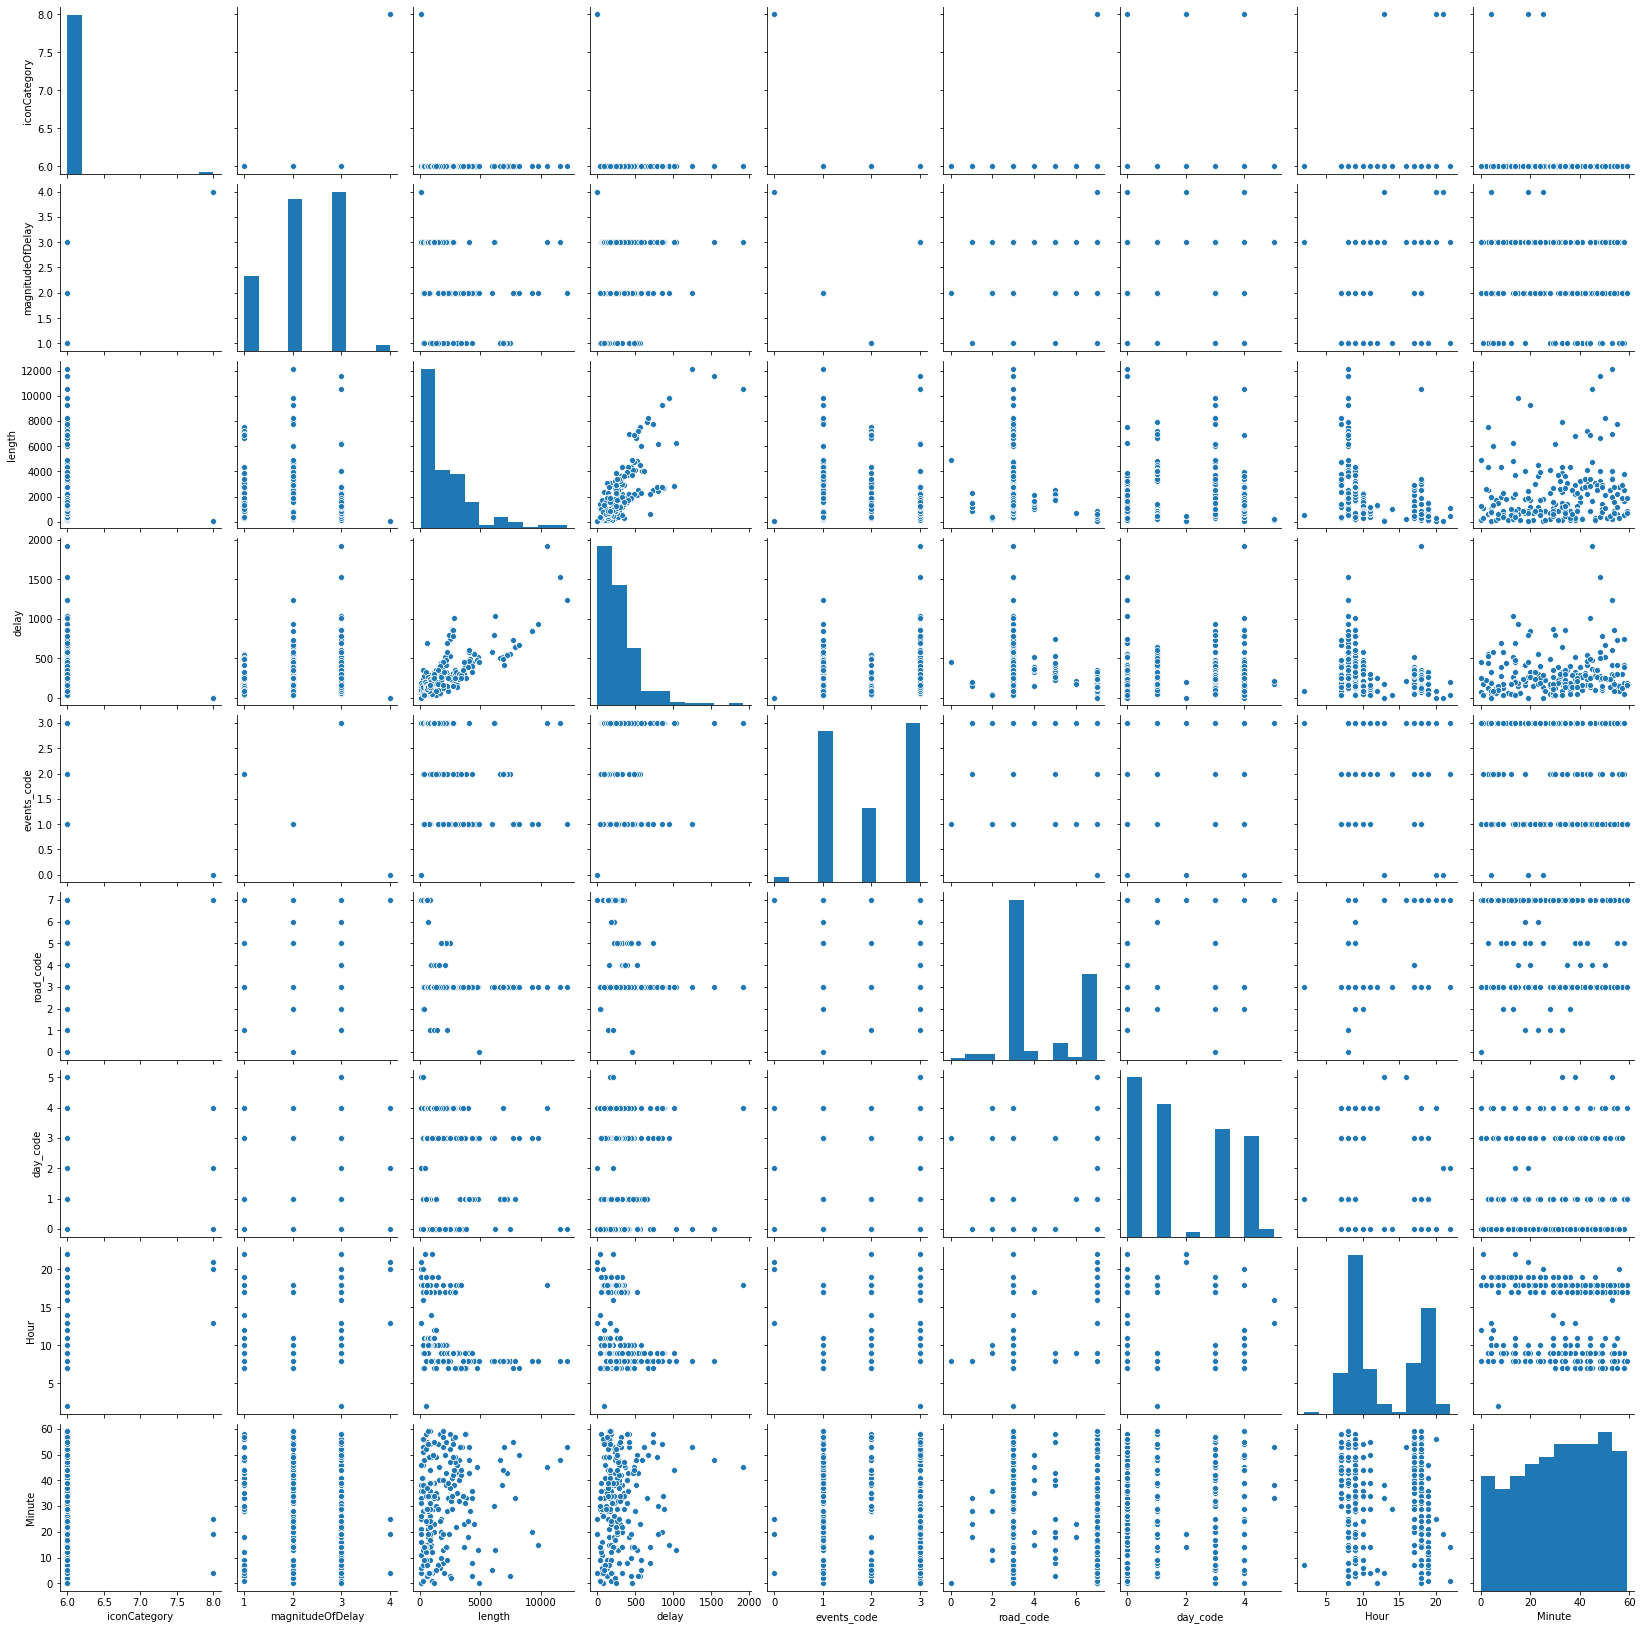

In [23]:
sns.pairplot(incidents)

C:\Users\netoa\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


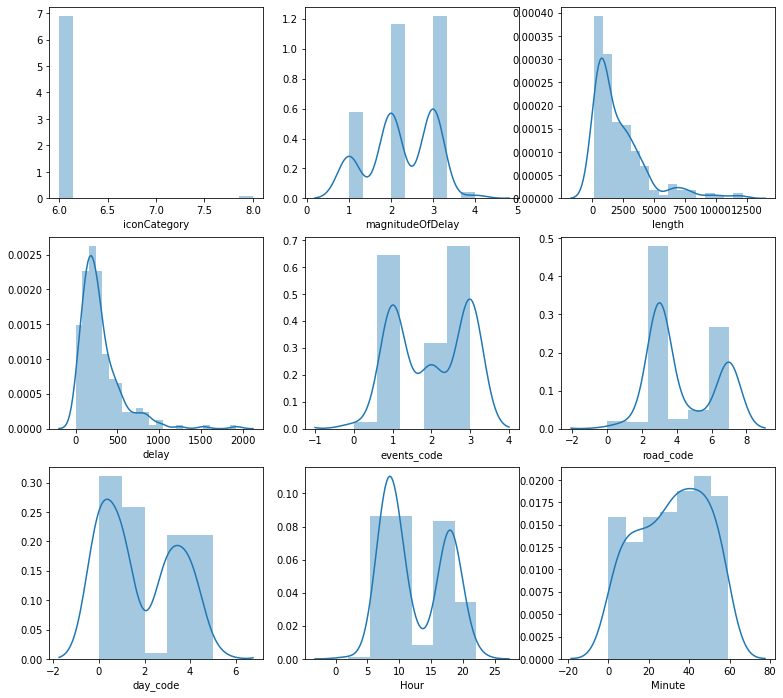

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,12))
df = incidents.drop(columns=['roadNumbers', 'events', 'period', 'site', 'day'])
for i, column in enumerate(df.columns):    
    sns.distplot(df[column], ax=axes[i//3,i%3])

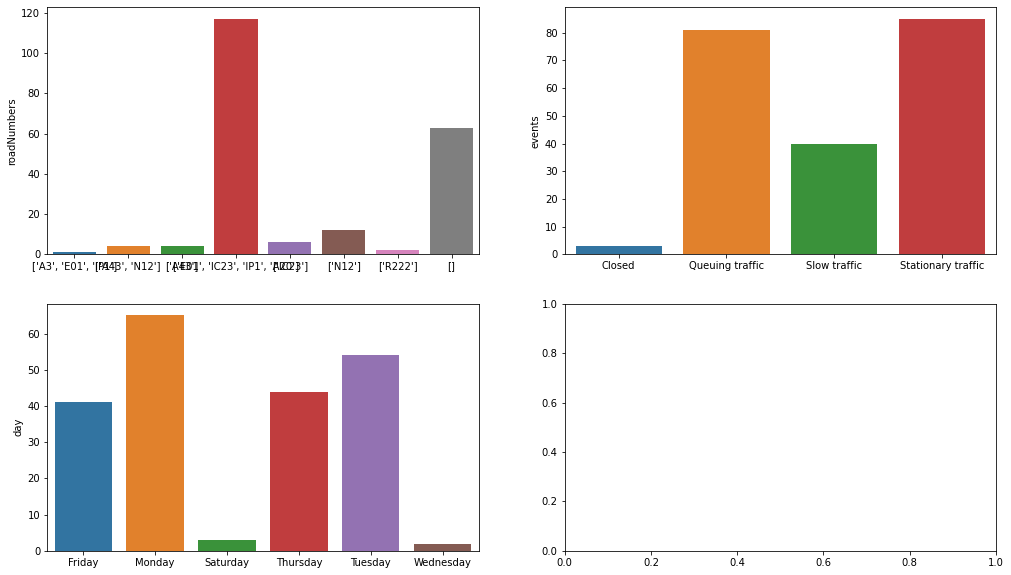

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,10))
df = pd.DataFrame(incidents, columns=['roadNumbers', 'events', 'day'])
for i, column in enumerate(df.columns):    
    sns.barplot(df[column].value_counts().index, df[column].value_counts(), ax=axes[i//2,i%2])

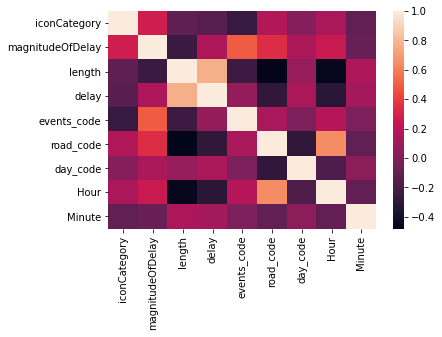

In [26]:
sns.heatmap(incidents.corr())

# Logistic Regression

In [27]:
#Criar o dataset com as colunas com as variáveis preditoras
preditors = incidents[['length', 'delay','day_code', 'road_code', 'Hour', 'Minute']]

#Criar a dataset com a variável target (alvo)
target = incidents['magnitudeOfDelay']

#Criar subconjunto de dados de treino e de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preditors, 
                                                    target, 
                                                    test_size=0.3,
                                                    random_state=123)

In [28]:
#vertor para armazenar os valores das perfomances de cada modelo e ao final do programa gerar uma tabela comparativa
performance = []

In [29]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=10000)

In [30]:
logmodel.fit(X_train,y_train)
logpredict = logmodel.predict(X_test)

In [31]:
print(classification_report(y_test, logpredict))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64        11
           2       0.76      0.52      0.62        31
           3       0.60      0.90      0.72        20
           4       1.00      1.00      1.00         1

    accuracy                           0.67        63
   macro avg       0.75      0.76      0.74        63
weighted avg       0.69      0.67      0.66        63



In [32]:
train_score = logmodel.score(X_train, y_train)
test_score = logmodel.score(X_test, y_test)

print(f'LogisticRegression : Training s core - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'LogisticRegression', 'training_score':train_score, 'accuracy_score':test_score})

LogisticRegression : Training s core - 0.8082191780821918 | Accuracy - 0.6666666666666666


In [33]:
y_train_preds = logmodel.predict_proba(X_train)[:,1]
y_test_preds = logmodel.predict_proba(X_test)[:,1]

# Naive Bayes

In [34]:
#Metodo Naive Bayes
NBmodel = GaussianNB()

In [35]:
#Executar o modelo e aplicar o predict sobre o modelo para uma posterior análise de desempenho do mesmo
NBmodel.fit(X_train, y_train)
NBpredict = NBmodel.predict(X_test)

In [36]:
#Confusion Matrix para Modelo Naive Bayes
print(classification_report(y_test, NBpredict))

              precision    recall  f1-score   support

           1       0.50      0.36      0.42        11
           2       0.52      0.45      0.48        31
           3       0.36      0.50      0.42        20
           4       0.00      0.00      0.00         1

    accuracy                           0.44        63
   macro avg       0.34      0.33      0.33        63
weighted avg       0.46      0.44      0.44        63

C:\Users\netoa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Armazenar nas variáveis os Scores dos dataset de treino e teste
train_score = NBmodel.score(X_train, y_train)
test_score = NBmodel.score(X_test, y_test) #Accuracy

In [38]:
#Exibe no console os scores de treino e teste. 
print(f'Gaussian Naive Bayes : Training score - {train_score} | Accuracy score - {test_score}')

#Armazena os valores obtidos acima no vetor performance.
performance.append({'Algoritmo':'Gaussian Naive Bayes', 'training_score':train_score, 'accuracy_score':test_score})

Gaussian Naive Bayes : Training score - 0.678082191780822 | Accuracy score - 0.4444444444444444


# Decision Tree

In [39]:
dtc = DecisionTreeClassifier()

In [40]:
dtc = dtc.fit(X_train, y_train)
dtcpredict = dtc.predict(X_test)

In [41]:
print(classification_report(y_test, dtcpredict))

              precision    recall  f1-score   support

           1       0.42      0.45      0.43        11
           2       0.68      0.55      0.61        31
           3       0.62      0.80      0.70        20
           4       0.00      0.00      0.00         1

    accuracy                           0.60        63
   macro avg       0.43      0.45      0.43        63
weighted avg       0.60      0.60      0.60        63

C:\Users\netoa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
train_score = dtc.score(X_train,y_train)
test_score = dtc.score(X_test,y_test)

print(f'Decision Tree : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'Decision Tree', 'training_score':train_score, 'accuracy_score':test_score})

Decision Tree : Training score - 1.0 | Accuracy - 0.6031746031746031


# Random Forest

In [43]:
rndTree = RandomForestClassifier()

In [44]:
rndTree.fit(X_train,y_train)
rndTpredict = rndTree.predict(X_test)

In [45]:
print(classification_report(y_test, rndTpredict))

              precision    recall  f1-score   support

           1       0.75      0.55      0.63        11
           2       0.77      0.74      0.75        31
           3       0.72      0.90      0.80        20
           4       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.56      0.55      0.55        63
weighted avg       0.74      0.75      0.74        63

C:\Users\netoa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
train_score = rndTree.score(X_train,y_train)
test_score = rndTree.score(X_test,y_test)

print(f'Random Forests : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'Random Forests', 'training_score':train_score, 'accuracy_score':test_score})

Random Forests : Training score - 1.0 | Accuracy - 0.746031746031746


# XGA Boost

In [47]:
xgb_model = xgb.XGBClassifier()

In [48]:
xgb_model.fit(X_train, y_train)
xgbpredict = xgb_model.predict(X_test)

C:\Users\netoa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[02:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
print(classification_report(y_test, xgbpredict))

              precision    recall  f1-score   support

           1       0.88      0.64      0.74        11
           2       0.82      0.74      0.78        31
           3       0.69      0.90      0.78        20
           4       1.00      1.00      1.00         1

    accuracy                           0.78        63
   macro avg       0.85      0.82      0.82        63
weighted avg       0.79      0.78      0.78        63



In [50]:
train_score = xgb_model.score(X_train,y_train)
test_score = xgb_model.score(X_test,y_test)

print(f'XGB Boost : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'XGB Boost', 'training_score':train_score, 'accuracy_score':test_score})

XGB Boost : Training score - 1.0 | Accuracy - 0.7777777777777778


# Performance Result

In [51]:
performance_df = pd.DataFrame(performance)

In [52]:
# Exibir tabela de performance dos modelos
performance_df

,Algoritmo,training_score,accuracy_score
0,LogisticRegression,0.808219,0.666667
1,Gaussian Naive Bayes,0.678082,0.444444
2,Decision Tree,1.000000,0.603175
3,Random Forests,1.000000,0.746032
4,XGB Boost,1.000000,0.777778


# Prediction

day_code:
- 0: "Monday"
- 1: "Tuesday"
- 2: "Wednesday"
- 3: "Thursday"
- 4: "Friday"
- 5: "Saturday"
- 6: "Sunday"

road_code: 0 - 7


In [55]:
dados = {'length':3200, 'delay':250, 'day_code':4, 'road_code':5, 'Hour':12, 'Minute':45}
df = pd.DataFrame(dados, index=[0])
df

,length,delay,day_code,road_code,Hour,Minute
0,3200,250,4,5,12,45


In [56]:
result = xgb_model.predict(df)
print(result)

[2]


Legenda:
- 0: "Unknown",
- 1: "Minor",
- 2: "Moderate",
- 3: "Major",
- 4: "Undefined (used for road closures and other indefinite delays)",
